# Imports

In [1]:
import pandas as pd

from llm_guesser.llm_predictor import LLMPredictor

/var/folders/x7/gwjk9h594mxb48nxl8w517sm0000gn/T/ipykernel_73862/2377323338.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/david/opt/anaconda3/envs/NeedInDatastack/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


# Gathering Relevant Questions

## Getting Data from CSVs

In [2]:
csv = pd.read_csv('user_data_public.csv', low_memory=False)

In [3]:
question_csv = pd.read_csv('question_data.csv', delimiter=';', low_memory=False)

## Filtering top questions

In [4]:
top_questions_string = """Questions meeting criteria: 62 out of 2617

Top 15 most predictive questions:
             question  response_rate  predictive_score  is_numeric
18                q35       0.736921               1.0       False
1449          q358077       0.814600               1.0       False
1439          q179268       0.792763               1.0       False
23                q41       0.791856               1.0       False
996            q44639       0.803908               1.0       False
959            q41953       0.711032               1.0       False
850            q35660       0.723830               1.0       False
2612           gender       0.970660               1.0       False
2614          gender2       0.967764               1.0       False
1466  d_religion_type       0.970645               1.0       False
1467          d_drugs       0.814629               1.0       False
658            q20930       0.785962               1.0       False
499            q16053       0.848942               1.0       False
1470          lf_want       0.970660               1.0       False
417             q9688       0.814629               1.0       False"""

top_questions = ["q35",
                 "q358077",
                 "q179268",
                 "q41",
                 "q44639",
                 "q41953",
                 "q35660",
                 "gender",
                 "gender2",
                 "d_religion_type",
                 "d_drugs",
                 "q20930",
                 "q16053",
                 "lf_want",
                 "q9688"]

In [5]:
relevant_questions = question_csv[question_csv['question'].isin(top_questions)]
relevant_questions

,question,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
21,q35,"Regardless of future plans, what's more intere...",Sex,Love,NaN,NaN,50384,N,NaN,sex/intimacy
26,q41,How important is religion/God in your life?,Extremely important,Somewhat important,Not very important,Not at all important,54140,O,NaN,religion/superstition
612,q9688,Could you date someone who does drugs?,No,"Yes, but only soft stuff like marijuana",Yes,NaN,55697,O,NaN,preference
744,q16053,How willing are you to meet someone from OkCup...,Totally willing!,"Hesitant, but I'd certainly consider it.",I'm not interested in meeting in person.,NaN,58043,O,NaN,preference
1053,q20930,Rate your self-confidence:,"Very, very high",Higher than average,Average,Below average,53737,O,NaN,descriptive
1417,q35660,How often are you open with your feelings?,Always,Usually,Rarely,Never,49489,O,NaN,descriptive
1613,q41953,About how long do you want your next relations...,One night,A few months to a year,Several years,The rest of my life,48614,O,NaN,preference
1678,q44639,Do you like scary movies?,Yes,No,NaN,NaN,54964,O,NaN,preference
2510,q179268,Are you either vegetarian or vegan?,Yes,No,NaN,NaN,54202,O,NaN,politics; descriptive
2539,q358077,Could you date someone who was really messy?,Yes,No,NaN,NaN,55695,O,NaN,preference


In [6]:
profile_csv = csv[top_questions + ['d_age']]

In [7]:
profile_csv = profile_csv.dropna()

In [8]:
profile_csv = profile_csv.sample(n=200).reset_index()
['row_index', 'q35', 'q358077', 'q179268', 'q41', 'q44639', 'q41953',
       'q35660', 'gender', 'gender2', 'd_religion_type', 'd_drugs', 'q20930',
       'q16053', 'lf_want', 'q9688', 'd_age', 'gender.1']

In [9]:
profile_csv.to_csv('data_for_report/profiles_for_processing.csv', index=True)
relevant_questions.to_csv('data_for_report/relevant_questions.csv', index=False)

# Tests + Fixes

In [30]:
import pandas as pd
csv = pd.read_csv('data_for_report/profiles_for_processing.csv', low_memory=False)
csv = csv.drop(columns=['Unnamed: 0', 'gender.1'])
csv.columns = ['row_index', 'q35', 'q358077', 'q179268', 'q41', 'q44639', 'q41953',
       'q35660', 'gender', 'gender2', 'd_religion_type', 'd_drugs', 'q20930',
       'q16053', 'lf_want', 'q9688', 'd_age']
csv.to_csv('data_for_report/profiles_for_processing.csv')

##

In [20]:
import numpy as np
from sklearn.metrics import r2_score

y = csv.d_age
mean_age = y.mean()

# MAE
mae = abs(y - mean_age).mean()

# Percentage within ±5 years
within_5 = ((y >= mean_age - 5) & (y <= mean_age + 5)).mean() * 100

# R²
y_pred = np.full_like(y, mean_age, dtype=float)
r2 = r2_score(y, y_pred)

print("MAE:", mae)
print("Within ±5 years (%):", within_5)
print("R²:", r2)

MAE: 6.4539
Within ±5 years (%): 41.5
R²: 0.0


## Median

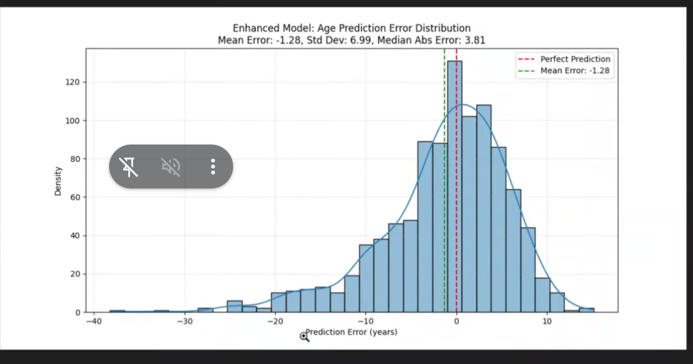

In [21]:
## TODO - Error distribution graph for LLM predictions

In [22]:
import numpy as np
from sklearn.metrics import r2_score

y = csv.d_age
median = y.median()

# MAE
mae = abs(y - median).mean()

# Percentage within ±5 years
within_5 = ((y >= median - 5) & (y <= median + 5)).mean() * 100

# R²
y_pred = np.full_like(y, median, dtype=float)
r2 = r2_score(y, y_pred)

print("MAE:", mae)
print("Within ±5 years (%):", within_5)
print("R²:", r2)

MAE: 6.4
Within ±5 years (%): 49.5
R²: -0.009359544477963722
